#### seaborn: statistical data visualization

![](https://seaborn.pydata.org/_static/logo-wide-lightbg.svg)

#### Sources and Contents to review
Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

#### Sources and Contents to review 
1. [Seaborn documentation](https://seaborn.pydata.org/index.html)
1. [User guide and tutorial](https://seaborn.pydata.org/tutorial.html)
1. [Learn Data Visualization Using Python Seaborn](https://medium.com/edureka/python-seaborn-tutorial-646fdddff322)
1. [Tutorialspoint seaborn](https://www.tutorialspoint.com/seaborn/index.htm)
1. [Seaborn Tutorial](https://www.youtube.com/watch?v=6GUZXDef2U0)
1. [Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

#### **Tutorial**


Official releases of seaborn can be installed from PyPI using pip or can installed usning conda:

In [1]:
# !pip install seaborn
# or
# !conda install seaborn

Import required library to start:

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

Seaborn has few datasets that can be used for practice:

In [84]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


First few examples:

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

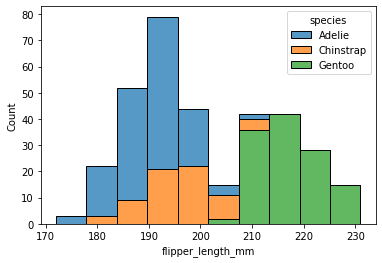

In [3]:
penguins = sns.load_dataset("penguins")
print(penguins.head())
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

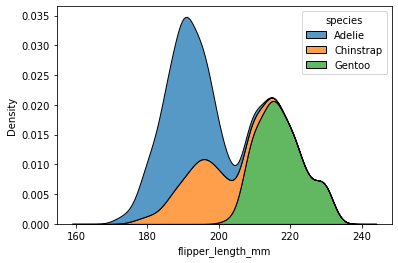

In [4]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

#### **Figure-level vs. axes-level functions**

there is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. The examples above are axes-level functions. They plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function. In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The organization looks a bit like this:

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

For example, displot() is the figure-level function for the distributions module. Its default behavior is to draw a histogram, using the same code as histplot() behind the scenes:

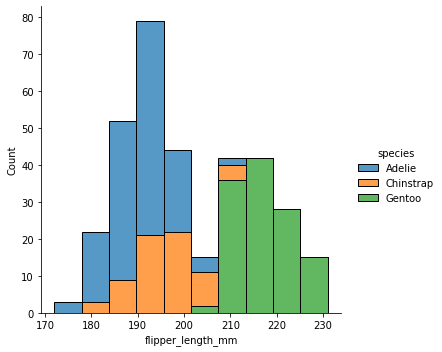

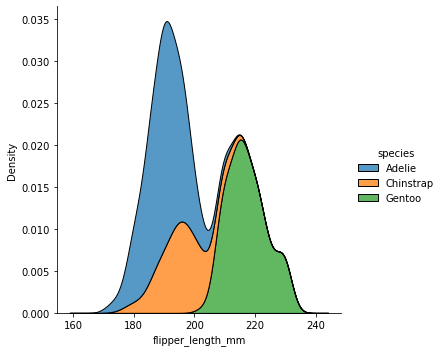

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

#### **Axes-level functions make self-contained plots**

The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.

The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

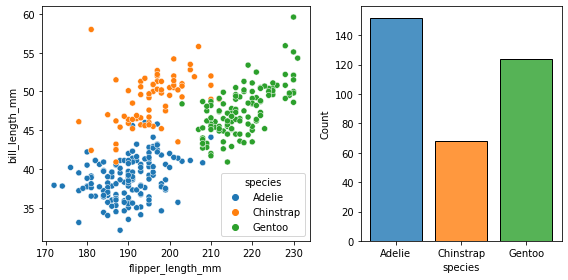

In [6]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

#### **Figure-level functions own their figure**
In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.

Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way:

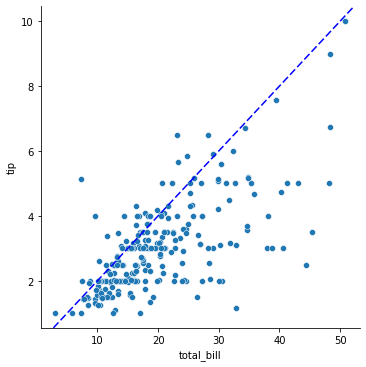

In [7]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

#### **Customizing plots from a figure-level function**
The figure-level functions return a FacetGrid instance, which has a few methods for customizing attributes of the plot in a way that is “smart” about the subplot organization. For example, you can change the labels on the external axes using a single line of code:

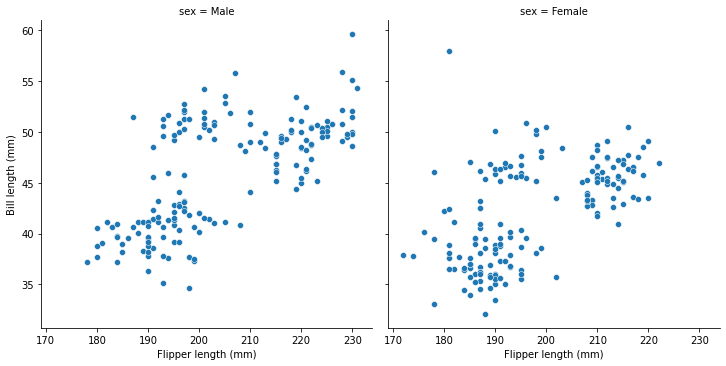

In [8]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

#### **Combining multiple views on the data**
Two important plotting functions in seaborn don’t fit cleanly into the classification scheme discussed above. These functions, jointplot() and pairplot(), employ multiple kinds of plots from different modules to represent mulitple aspects of a dataset in a single figure. Both plots are figure-level functions and create figures with multiple subplots by default. But they use different objects to manage the figure: JointGrid and PairGrid, respectively. jointplot() plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately:

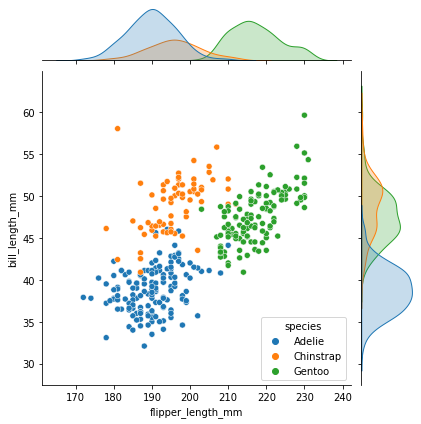

In [9]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

Behind the scenes, these functions are using axes-level functions that you have already met (scatterplot() and kdeplot()), and they also have a kind parameter that lets you quickly swap in a different representation:

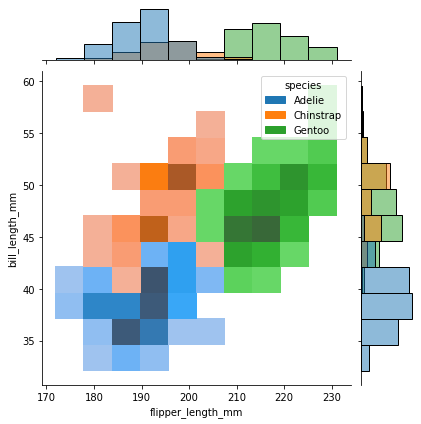

In [10]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

#### **Data structures accepted by seaborn**

As a data visualization library, seaborn requires that you provide it with data. This chapter explains the various ways to accomplish that task.

### Long-form vs. wide-form data
Most plotting functions in seaborn are oriented towards vectors of data. When plotting x against y, each variable should be a vector. Seaborn accepts data sets that have more than one vector organized in some tabular fashion. There is a fundamental distinction between “long-form” and “wide-form” data tables, and seaborn will treat each differently.

![](https://seaborn.pydata.org/_images/data_structure_19_0.png)

## Long-form data
A long-form data table has the following characteristics:

* Each variable is a column
* Each observation is a row

In [11]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


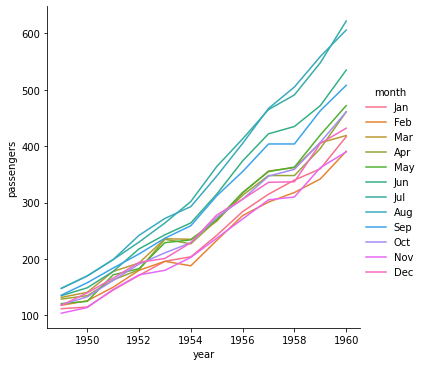

In [12]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

## Wide-form data
For simple datasets, it is often more intuitive to think about data the way it might be viewed in a spreadsheet, where the columns and rows contain levels of different variables. For example, we can convert the flights dataset into a wide-form organization by “pivoting” it so that each column has each month’s time series over years:

In [13]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


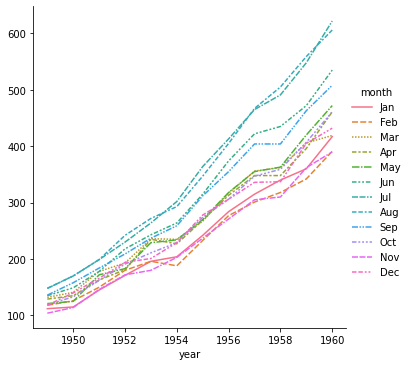

In [14]:
sns.relplot(data=flights_wide, kind="line")

#### **Visualizing statistical relationships**

tatistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three seaborn functions in this tutorial. The one we will use most is relplot(). This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions:

scatterplot() (with kind="scatter"; the default)

lineplot() (with kind="line")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


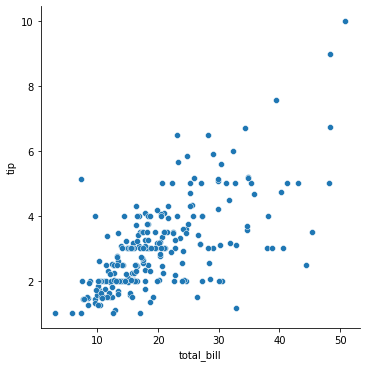

In [15]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);
tips.head()

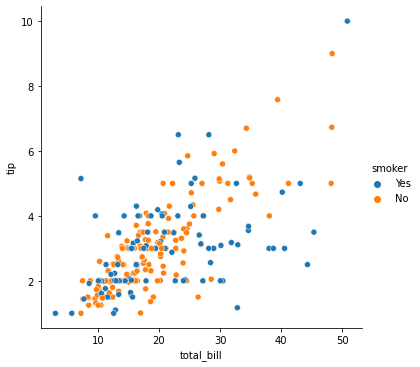

In [16]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

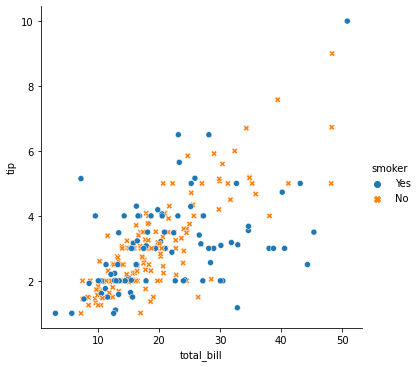

In [17]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

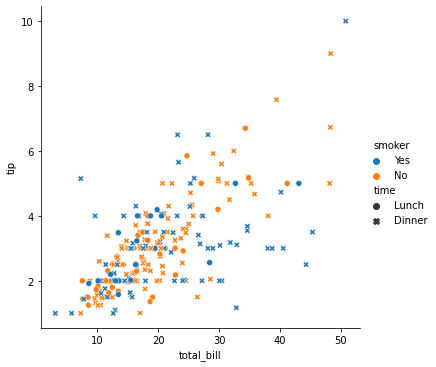

In [18]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

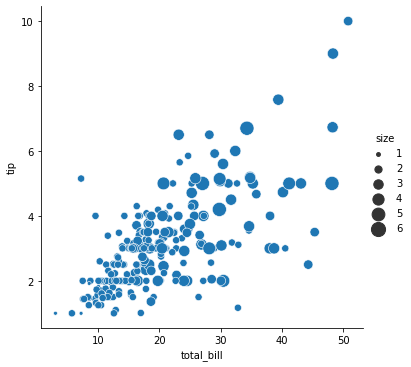

In [19]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels. But all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documentation to see how it works:

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


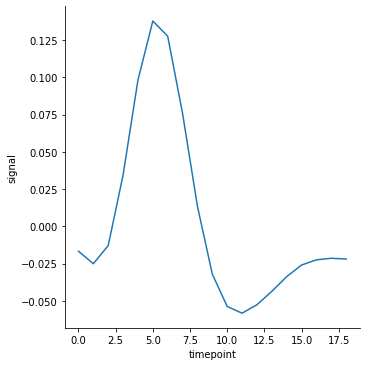

In [20]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, ci=None);
fmri.head()

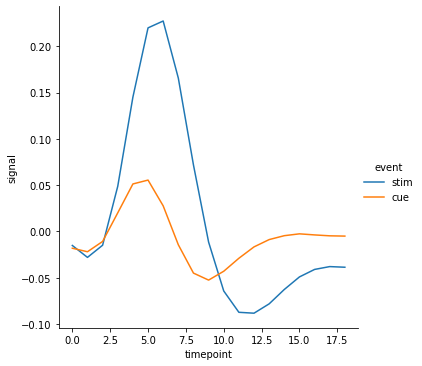

In [21]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", ci=None, data=fmri);

You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows.

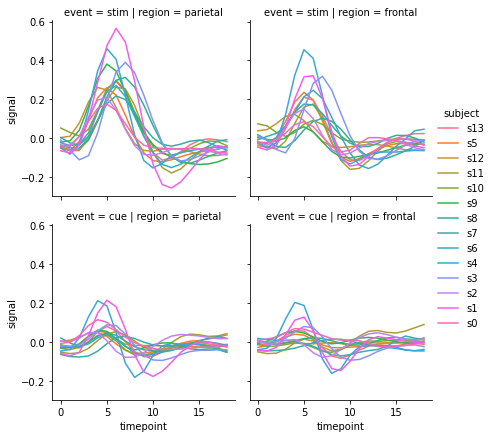

In [22]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

#### Visualizing distributions of data
An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions. What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers? Do the answers to these questions vary across subsets defined by other variables?

The distributions module contains several functions designed to answer questions such as these. The axes-level functions are histplot(), kdeplot(), ecdfplot(), and rugplot(). They are grouped together within the figure-level displot(), jointplot(), and pairplot() functions.

### Plotting univariate histograms

Perhaps the most common approach to visualizing a distribution is the histogram. This is the default approach in displot(), which uses the same underlying code as histplot(). A histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


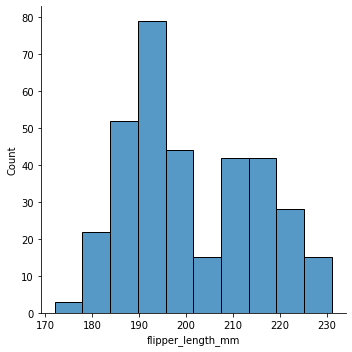

In [23]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")
penguins.head()

Deteminig the barwith and number of bine using `binwith` and ``b:

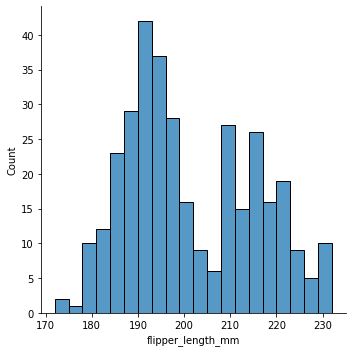

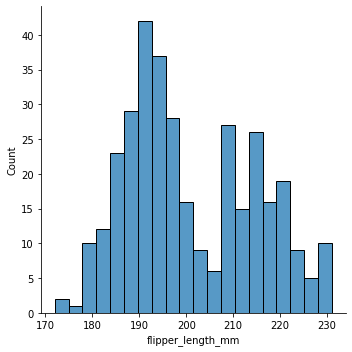

In [24]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)
sns.displot(penguins, x="flipper_length_mm", bins=20)

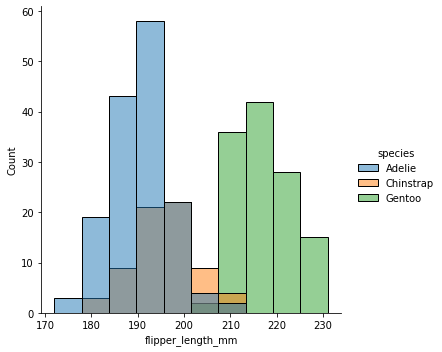

In [25]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

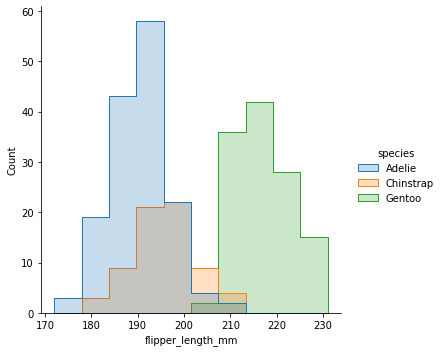

In [26]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

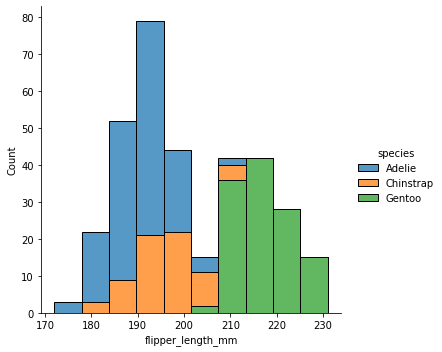

In [27]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

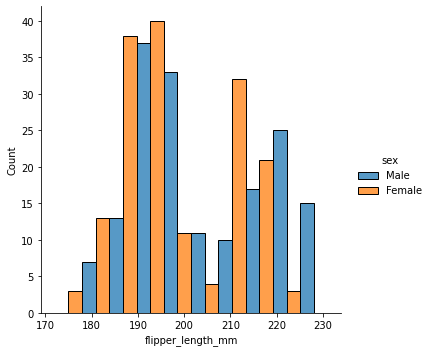

In [28]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

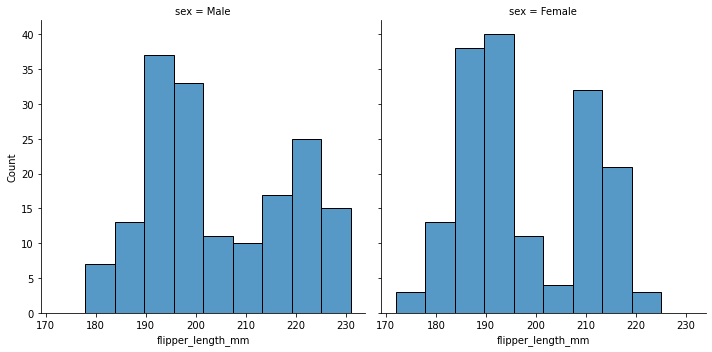

In [29]:
sns.displot(penguins, x="flipper_length_mm", col="sex", multiple="dodge")

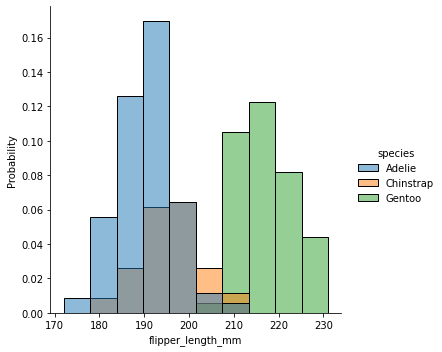

In [30]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")

#### Kernel density estimation

A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

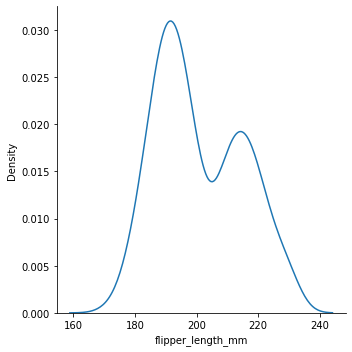

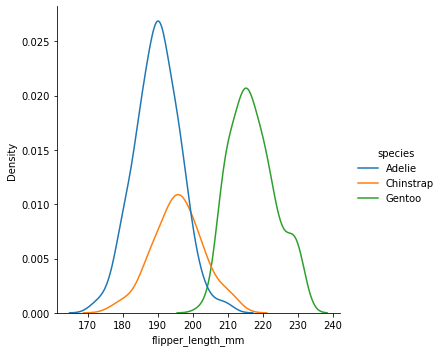

In [31]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

#### Visualizing bivariate distributions

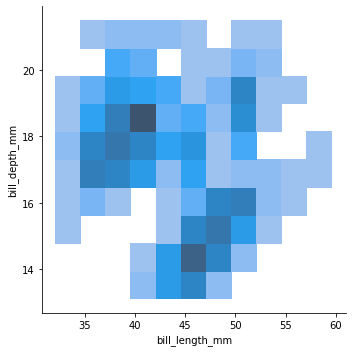

In [32]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

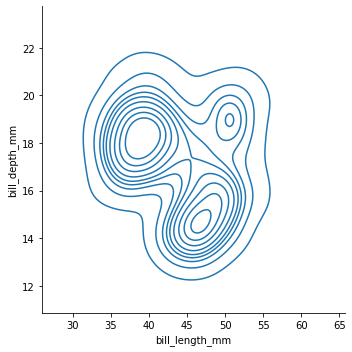

In [33]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

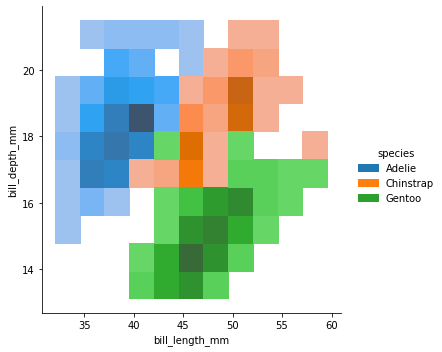

In [34]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

#### Plotting joint and marginal distributions

jointplot() augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. By default, jointplot() represents the bivariate distribution using scatterplot() and the marginal distributions using histplot():



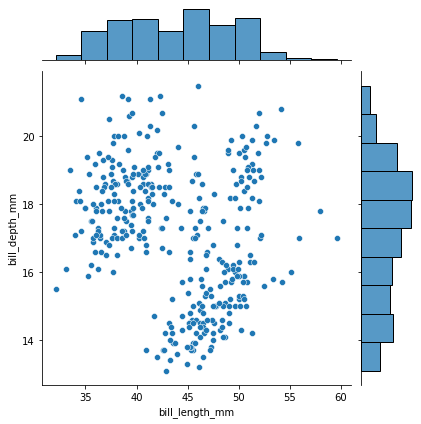

In [35]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

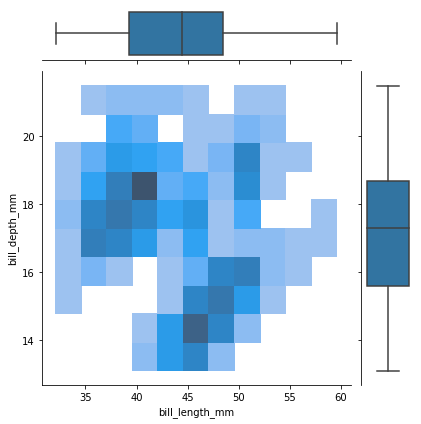

In [36]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

#### Plotting many distributions
The pairplot() function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, pairplot() uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships:



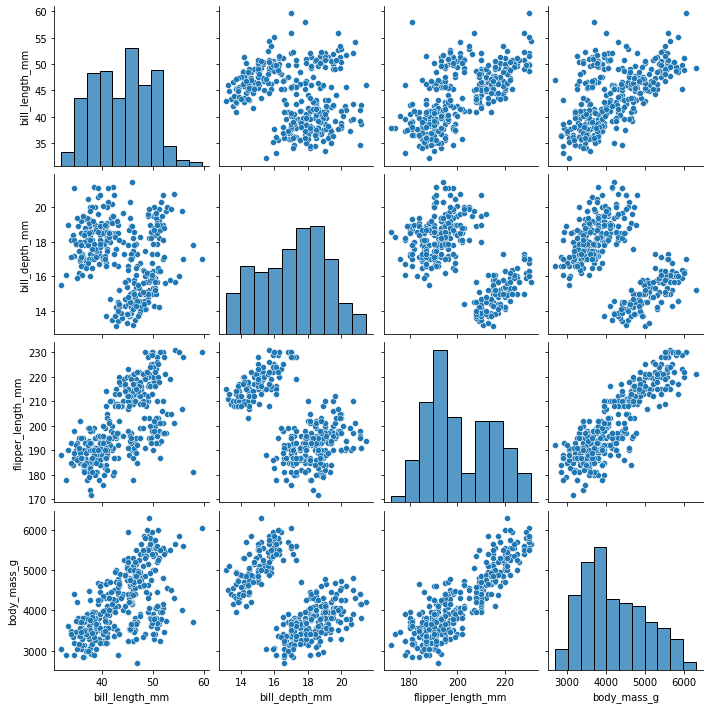

In [37]:
sns.pairplot(penguins)

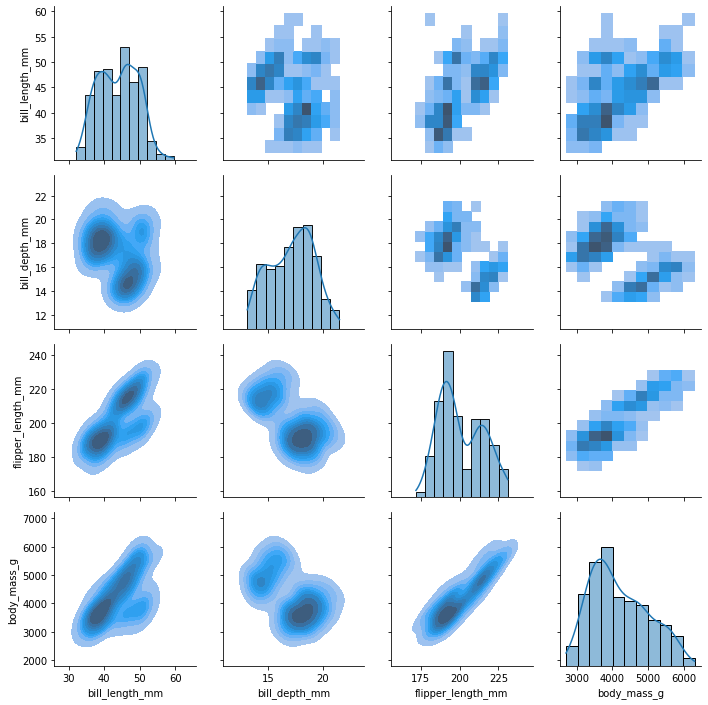

In [38]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

#### Plotting with categorical data
In the relational plot tutorial we saw how to use different visual representations to show the relationship between multiple variables in a dataset. In the examples, we focused on cases where the main relationship was between two numerical variables. If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between relplot() and either scatterplot() or lineplot(), there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

Categorical scatterplots:

* stripplot() (with kind="strip"; the default)
* swarmplot() (with kind="swarm")

Categorical distribution plots:

* boxplot() (with kind="box")
* violinplot() (with kind="violin")
* boxenplot() (with kind="boxen")

Categorical estimate plots:

* pointplot() (with kind="point")
* barplot() (with kind="bar")
* countplot() (with kind="count")



##### Categorical scatterplots

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


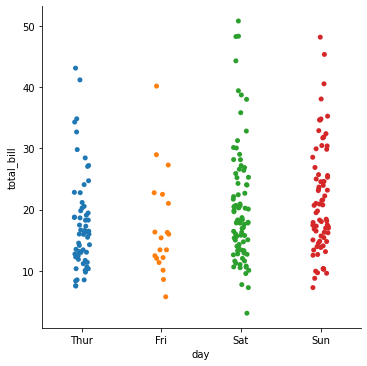

In [41]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips)
tips.head()

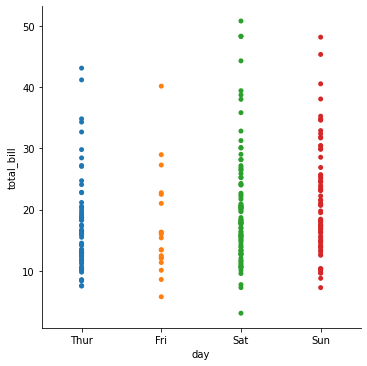

In [42]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

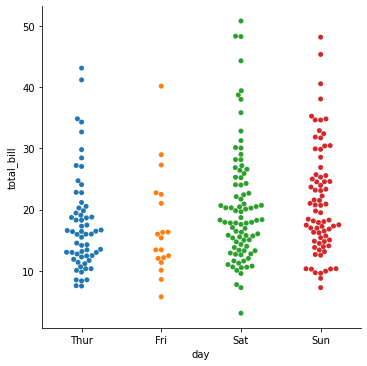

In [43]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

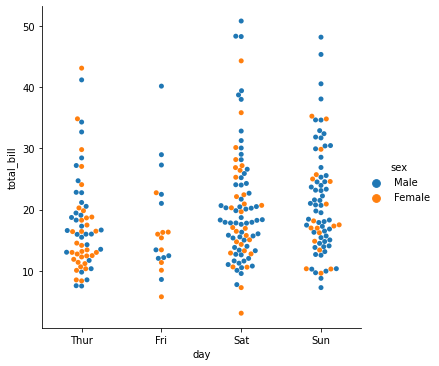

In [51]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

##### Boxplots

This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

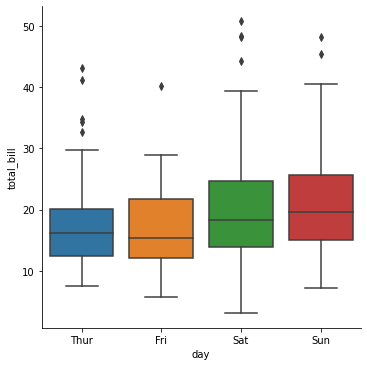

In [45]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

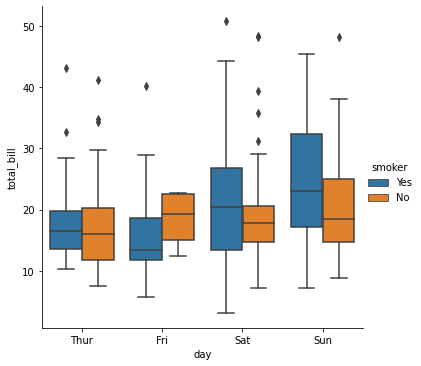

In [46]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

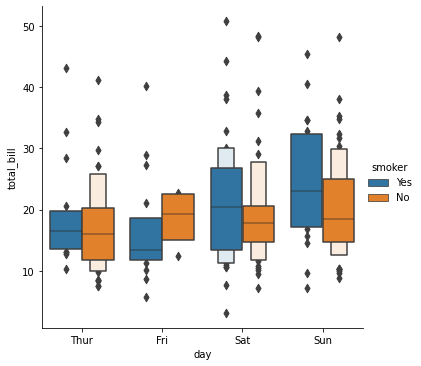

In [47]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="boxen", data=tips)

#### Violinplots
Violinplot combines a boxplot with the kernel density estimation.

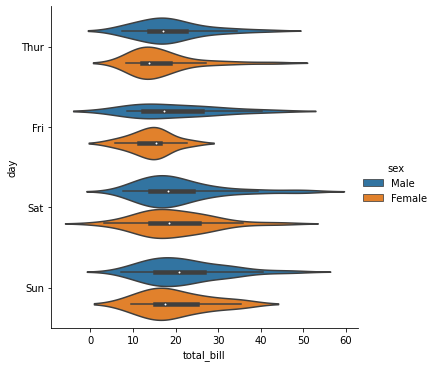

In [49]:
sns.catplot(x="total_bill", y="day", hue="sex",kind="violin", data=tips)

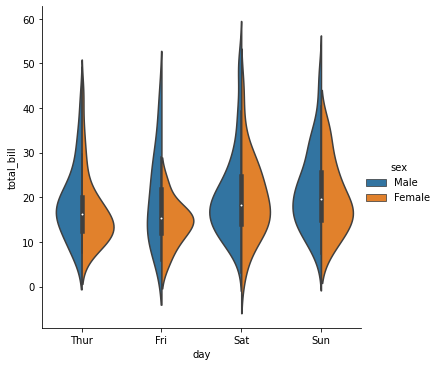

In [50]:
sns.catplot(x="day", y="total_bill", hue="sex",kind="violin", split=True, data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

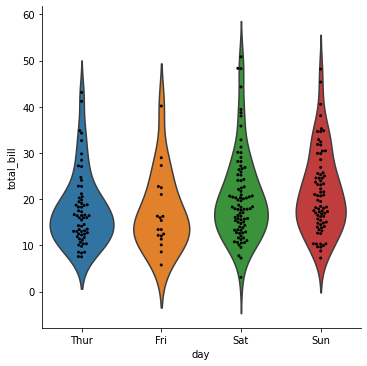

In [52]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

#### Bar plots
A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


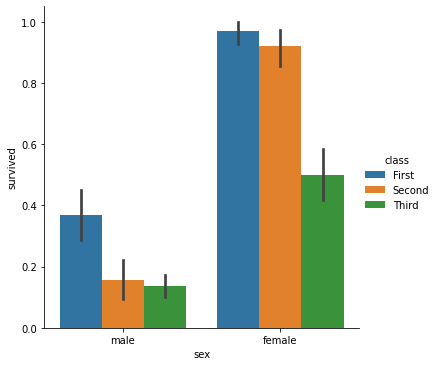

In [56]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
titanic.head()

<AxesSubplot:xlabel='sex', ylabel='count'>

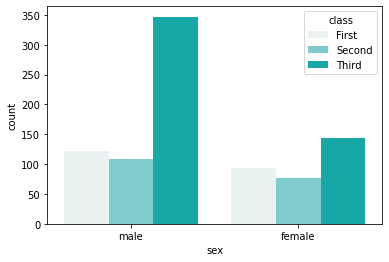

In [60]:
sns.countplot(x="sex", hue="class", data=titanic, color="c")

##### Showing multiple relationships with facets

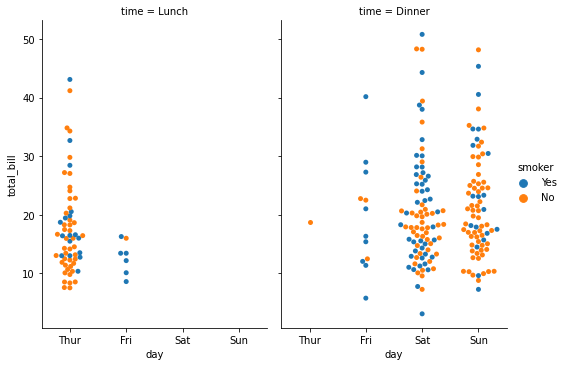

In [62]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.7,
            kind="swarm", data=tips)

#### Building structured multi-plot grids

When exploring multi-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of your dataset. This technique is sometimes called either “lattice” or “trellis” plotting, and it is related to the idea of “small multiples”. It allows a viewer to quickly extract a large amount of information about a complex dataset. Matplotlib offers good support for making figures with multiple axes; seaborn builds on top of this to directly link the structure of the plot to the structure of your dataset.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


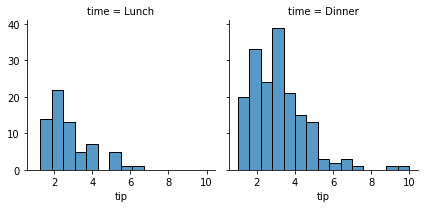

In [66]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")
tips.head()

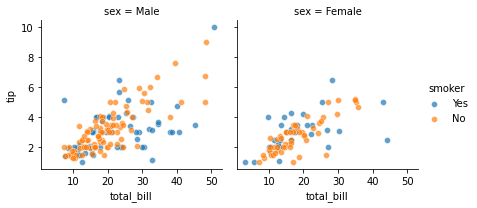

In [67]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

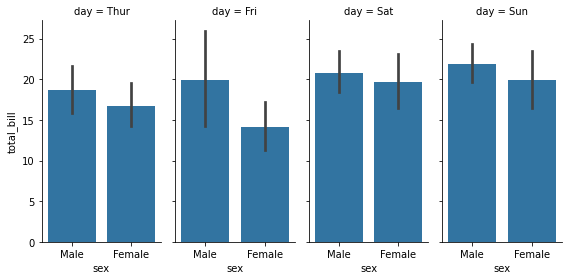

In [68]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])

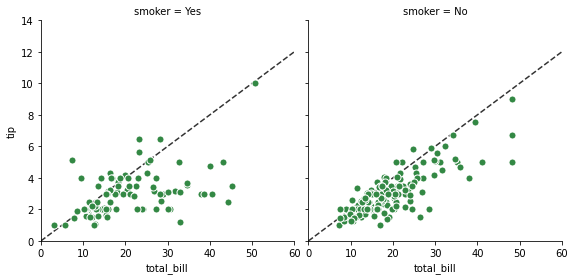

In [72]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
g.set(xlim=(0, 60), ylim=(0, 14))

##### Using custom functions

You’re not limited to existing matplotlib and seaborn functions when using FacetGrid. However, to work properly, any function you use must follow a few rules:
1. It must plot onto the “currently active” matplotlib Axes. This will be true of functions in the matplotlib.pyplot namespace, and you can call matplotlib.pyplot.gca() to get a reference to the current Axes if you want to work directly with its methods.
2. It must accept the data that it plots in positional arguments. Internally, FacetGrid will pass a Series of data for each of the named positional arguments passed to FacetGrid.map().
3. It must be able to accept color and label keyword arguments, and, ideally, it will do something useful with them. In most cases, it’s easiest to catch a generic dictionary of **kwargs and pass it along to the underlying plotting function.

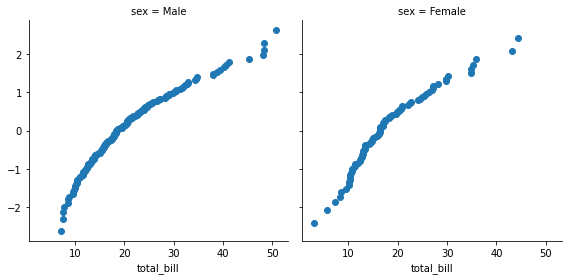

In [73]:
from scipy import stats
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill")

##### Plotting pairwise data relationships

PairGrid also allows you to quickly draw a grid of small subplots using the same plot type to visualize data in each. In a PairGrid, each row and column is assigned to a different variable, so the resulting plot shows each pairwise relationship in the dataset. This style of plot is sometimes called a “scatterplot matrix”, as this is the most common way to show each relationship, but PairGrid is not limited to scatterplots.



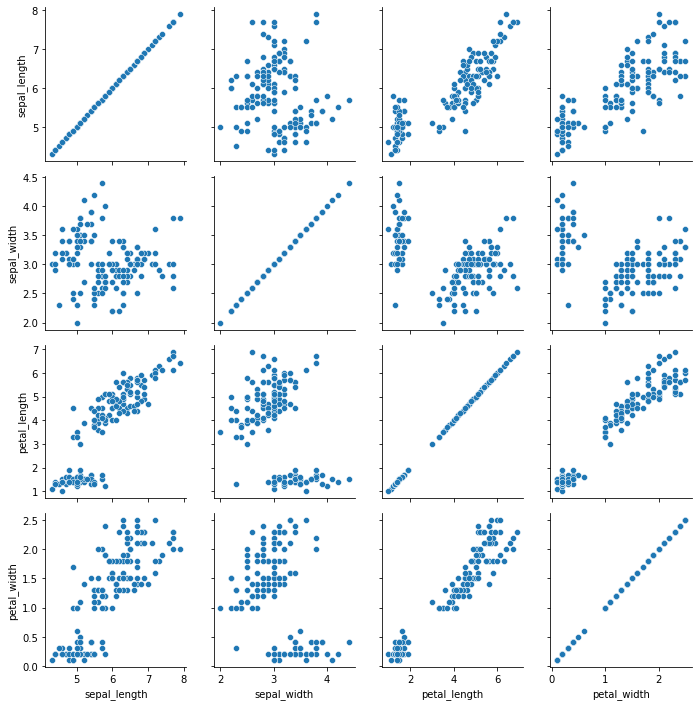

In [74]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(sns.scatterplot)

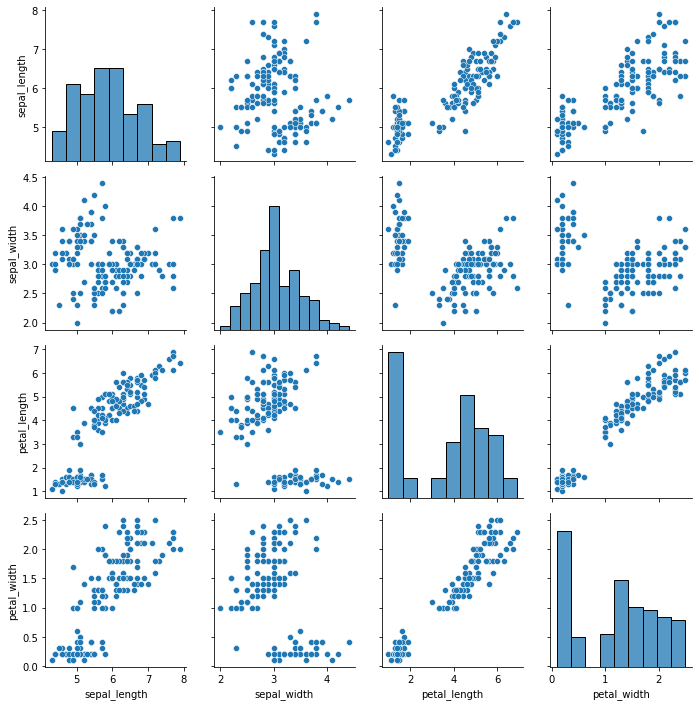

In [75]:
g = sns.PairGrid(iris)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

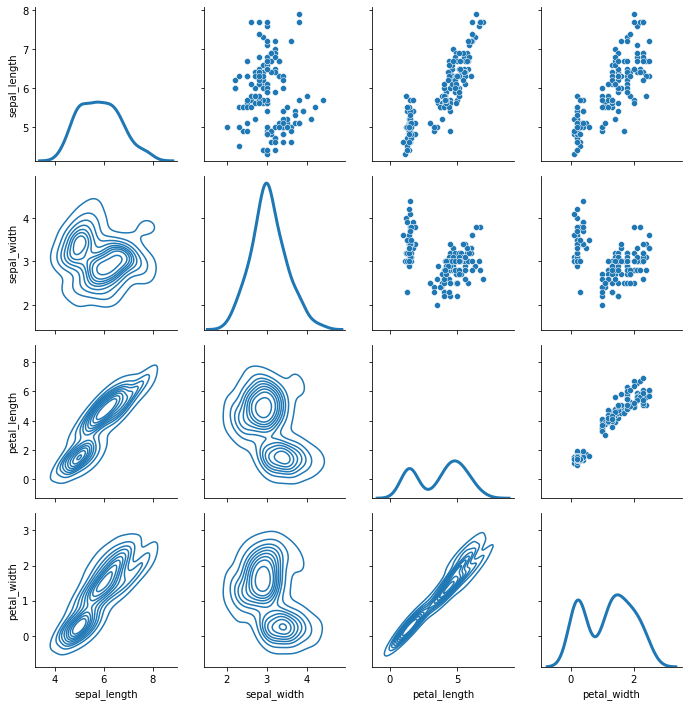

In [76]:
g = sns.PairGrid(iris)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

PairGrid is flexible, but to take a quick look at a dataset, it can be easier to use pairplot(). This function uses scatterplots and histograms by default, although a few other kinds will be added (currently, you can also plot regression plots on the off-diagonals and KDEs on the diagonal).

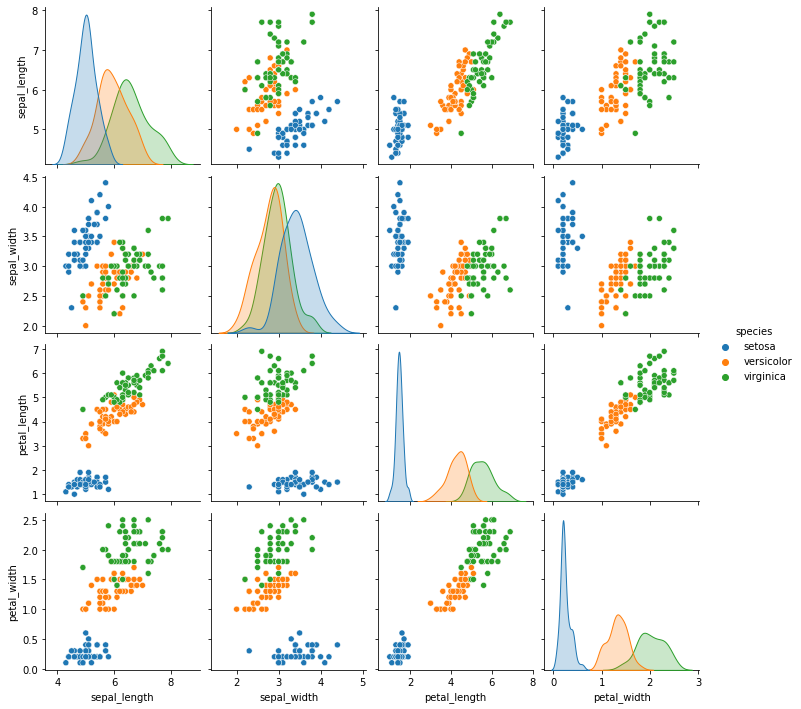

In [79]:
sns.pairplot(iris, hue="species", height=2.5)

#### Seaborn Theme and Color Palettes

There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. They are each suited to different applications and personal preferences. The default theme is darkgrid. As mentioned above, the grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. The whitegrid theme is similar, but it is better suited to plots with heavy data elements:

{'axes.facecolor': 'white', 'axes.edgecolor': '.8', 'axes.grid': True, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': '.8', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.15', 'ytick.color': '.15', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': 'round', 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'font.family': ['sans-serif'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'xtick.bottom': False, 'xtick.top': False, 'ytick.left': False, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


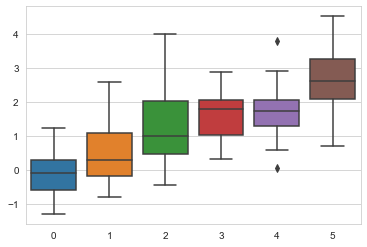

In [92]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)
print(sns.axes_style())

{'axes.facecolor': '#EAEAF2', 'axes.edgecolor': 'white', 'axes.grid': False, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': 'white', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.15', 'ytick.color': '.15', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': 'round', 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'font.family': ['sans-serif'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'xtick.bottom': False, 'xtick.top': False, 'ytick.left': False, 'ytick.right': True, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


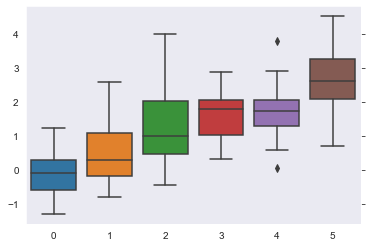

In [100]:
sns.set_style("dark",{'ytick.right': True})
sns.boxplot(data=data)
print(sns.axes_style())

The most important function for working with color palettes is, aptly, color_palette(). This function provides an interface to most of the possible ways that one can generate color palettes in seaborn. And it’s used internally by any function that has a palette argument.

In [95]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [101]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [106]:
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

<AxesSubplot:>

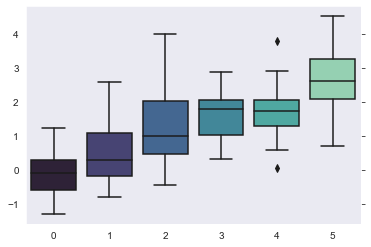

In [109]:
sns.set_palette("mako")
sns.boxplot(data=data)